In [82]:
import glob
import json
main_path = '/home/diego/Downloads/data_sqm/en plataforma/**.json'

paths = glob.glob(main_path, recursive=True)
paths_2a = [path for path in paths if '2a' in path]
paths_3a = [path for path in paths if '3a' in path]
paths_5a = [path for path in paths if '5a' in path]
paths_6a = [path for path in paths if '6a' in path]
paths_7a = [path for path in paths if '7a' in path]
paths_pam = [path for path in paths if 'pam' in path]
selected_paths = [*paths_2a, *paths_3a, *paths_5a, *paths_6a, *paths_7a, *paths_pam]
other_paths = [path for path in paths if path not in selected_paths]
paths = other_paths
print(len(paths))
print(paths)

72
['/home/diego/Downloads/data_sqm/en plataforma/rbs_04052025_150m_10ms_100khz.json', '/home/diego/Downloads/data_sqm/en plataforma/9d_04072025_100m_10ms_100khz.json', '/home/diego/Downloads/data_sqm/en plataforma/rbs_04052025_150m_7ms_100khz.json', '/home/diego/Downloads/data_sqm/en plataforma/hk16-sectorb_04102025_150m_10ms_100khz.json', '/home/diego/Downloads/data_sqm/en plataforma/9f_04072025_150m_10ms_100khz.json', '/home/diego/Downloads/data_sqm/en plataforma/hk16-sectorc_04102025_150m_7ms_100khz.json', '/home/diego/Downloads/data_sqm/en plataforma/9e_04072025_150m_10ms_100khz.json', '/home/diego/Downloads/data_sqm/en plataforma/k10-sectorb_04082025_100m_10ms_100khz.json', '/home/diego/Downloads/data_sqm/en plataforma/k10-sectorc_04082025_150m_10ms_100khz.json', '/home/diego/Downloads/data_sqm/en plataforma/3b_04052025_100m_10ms_100khz.json', '/home/diego/Downloads/data_sqm/en plataforma/7i_05202025_100m_7ms_100khz.json', '/home/diego/Downloads/data_sqm/en plataforma/7b_04062025

In [83]:
area_total = 0
for path in paths:
    with open(path, 'r') as f:
        data = json.load(f)
        area_m2 = data['Area poza medida']
        area_total += area_m2

In [84]:
(area_total/0.95)

3817331.831293772

In [85]:
list_of_percentages = []
for path in paths:
    with open(path, 'r') as f:
        data = json.load(f)
        altura_promedio = data['altura sal (cm) (lidar)']
        altura_promedio_diagonal_1 = data['diagonal1']['mean']*100
        altura_promedio_diagonal_2 = data['diagonal2']['mean']*100
        #print(altura_promedio, altura_promedio_diagonal_1, altura_promedio_diagonal_2)
        dif_total_diag_1 = altura_promedio_diagonal_1-altura_promedio
        dif_percentage_total_diag_1 = (dif_total_diag_1)/altura_promedio*100
        dif_total_diag_2 = altura_promedio_diagonal_2-altura_promedio
        dif_percentage_total_diag_2 = (dif_total_diag_2)/altura_promedio*100
        #print(dif_percentage_total_diag_1, dif_percentage_total_diag_2)
        list_of_percentages.append([path.split('/')[-1][:-5], altura_promedio, altura_promedio_diagonal_1, dif_total_diag_1, dif_percentage_total_diag_1, altura_promedio_diagonal_2, dif_total_diag_2,dif_percentage_total_diag_2])

In [86]:
import numpy as np
import pandas as pd
array_of_percentages = np.array(list_of_percentages)
df_of_percentages = pd.DataFrame(array_of_percentages, columns=['Nombre', 'Altura Promedio HS', 'Altura D1', 'Diferencia D1-HS', '% Diferencia D1-HS', 'Altura D2', 'Diferencia D2-HS', '% Diferencia D2-HS'])
df_of_percentages
# export df
df_of_percentages.to_csv('/home/diego/Downloads/ResumenAlturas.csv')

In [87]:
idx_d1, idx_d2 = 3, 6
new_array_of_percentages = array_of_percentages[:, [idx_d1, idx_d2]].astype(float)
mean = np.mean(new_array_of_percentages, axis=0)
median = np.median(new_array_of_percentages, axis=0)
std = np.std(new_array_of_percentages, axis=0)
min = np.min(new_array_of_percentages, axis=0)
max = np.max(new_array_of_percentages, axis=0)
columns = ['Resumen Diferencia D1-HS', 'Resumen Diferencia D2-HS']
indexes = ['Promedio', 'Mediana', 'Desviación Estándar', 'Mínimo', 'Máximo']
df = pd.DataFrame([mean, median, std, min, max], columns=columns, index=indexes)
df

,Resumen Diferencia D1-HS,Resumen Diferencia D2-HS
Promedio,-2.587912,-3.177994
Mediana,-0.841148,-0.409845
Desviación Estándar,7.267877,9.798132
Mínimo,-34.591373,-39.098942
Máximo,7.922631,13.314408


In [88]:
# remove outliers
def remove_outliers(data, threshold=3):
    q1 = np.percentile(data, 10)
    q3 = np.percentile(data, 90)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    return data[(data > lower_bound) & (data < upper_bound)]

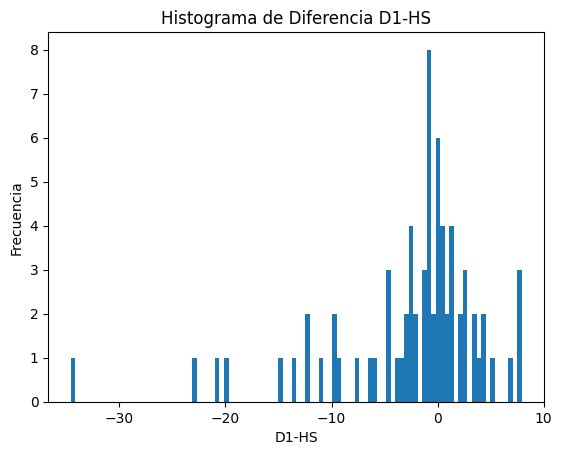

Promedio: -2.5879118297305195, Mediana: -0.8411479475018737, Desviación: 7.267876958966756


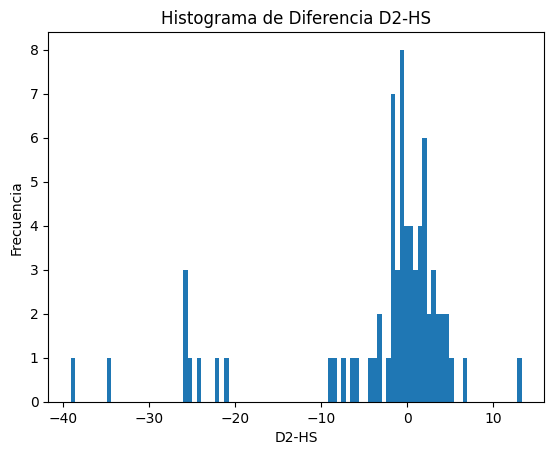

Promedio: -3.177994337120337, Mediana: -0.40984479826403764, Desviación: 9.798131630765004


In [89]:
import matplotlib.pyplot as plt
vd1hs = array_of_percentages[:, idx_d1].astype(float)
vd1hs = remove_outliers(vd1hs)
vd2hs = array_of_percentages[:, idx_d2].astype(float)
vd2hs = remove_outliers(vd2hs)
plt.hist(vd1hs, bins=100)
plt.xlabel('D1-HS')
plt.ylabel('Frecuencia')
plt.title('Histograma de Diferencia D1-HS')
plt.show()
mean_vd1 = np.mean(vd1hs)
median_vd1 = np.median(vd1hs)
std_vd1 = np.std(vd1hs)
print(f"Promedio: {mean_vd1}, Mediana: {median_vd1}, Desviación: {std_vd1}")
plt.hist(vd2hs, bins=100)
plt.xlabel('D2-HS')
plt.ylabel('Frecuencia')
plt.title('Histograma de Diferencia D2-HS')
plt.show()
mean_vd2 = np.mean(vd2hs)
median_vd2 = np.median(vd2hs)
std_vd2 = np.std(vd2hs)
print(f"Promedio: {mean_vd2}, Mediana: {median_vd2}, Desviación: {std_vd2}")